<a href="https://colab.research.google.com/github/Patrick5455/Customer-Churn-Prediction/blob/master/modelling/customer_churn_modelling_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import some libraries
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams 
import seaborn as sns
import os
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

> Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE

> > Project packages

In [ ]:
# from project_package.data_package import data
# from project_package.model_package import model, model_metrics
# from project_package.plot_package import bi_plot, uni_plot
# 

In [ ]:
# ?KNNImputer

> Load Datasets

In [ ]:
#g-drive paths
train = '/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/AIMS_Train.csv'
test = '/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/AIMS_Test.csv'
variables = '/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/VariableDefinitions.csv'
submissions = '/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/AIMS_SampleSubmission.csv'

In [ ]:
#colab
train = pd.read_csv(train)
test=  pd.read_csv(test)
submission = pd.read_csv(submissions)
variables = pd.read_csv(variables)

In [ ]:
#import data - jupyter localhost

# train = pd.read_csv('../datasets/AIMS_Train.csv')
# test=  pd.read_csv('../datasets/AIMS_Test.csv')
# submission = pd.read_csv('../datasets/AIMS_SampleSubmission.csv')
# variables = pd.read_csv('../datasets/VariableDefinitions.csv')

In [ ]:
variables

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646214 entries, 0 to 646213
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         646214 non-null  object 
 1   REGION          391246 non-null  object 
 2   TENURE          646214 non-null  object 
 3   MONTANT         419154 non-null  float64
 4   FREQUENCE_RECH  419154 non-null  float64
 5   REVENUE         428459 non-null  float64
 6   ARPU_SEGMENT    428459 non-null  float64
 7   FREQUENCE       428459 non-null  float64
 8   DATA_VOLUME     327544 non-null  float64
 9   ON_NET          409962 non-null  float64
 10  ORANGE          377516 non-null  float64
 11  TIGO            259060 non-null  float64
 12  ZONE1           50406 non-null   float64
 13  ZONE2           41072 non-null   float64
 14  MRG             646214 non-null  object 
 15  REGULARITY      646214 non-null  int64  
 16  TOP_PACK        375331 non-null  object 
 17  FREQ_TOP_P

In [ ]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) 
train = train.sample(frac=.3, random_state=123)
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
542316,16a8528ec3b1201f5cb8bfc35533744b79bd44d2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1
59878,3a8b710546fb6272a56908c2fcbcef20e2caa0cf,K > 24 month,11650.0,30.0,11682.0,3894.0,32.0,7119.0,23.0,468.0,54.0,0.0,NaN,60,18.0,0
10729,0f34b0bf4dac19dd901b7e03dd79cb79ed0b744a,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NaN,7.0,45.0,NaN,NaN,NaN,22,2.0,0
456437,dc34cfe39e89bddddf7f7550431681b6fc31e72e,K > 24 month,500.0,1.0,480.0,160.0,4.0,1875.0,14.0,1.0,NaN,NaN,NaN,20,2.0,0
273902,3920ace4d36a498dde155bec15757407846258fc,K > 24 month,11150.0,34.0,11750.0,3917.0,40.0,789.0,125.0,303.0,29.0,0.0,NaN,46,31.0,0


In [ ]:
train.tail()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
392679,48d344fd728daa817fdcc1d5b42c24bf9ca40227,K > 24 month,500.0,1.0,500.0,167.0,1.0,0.0,9.0,8.0,15.0,NaN,NaN,20,1.0,0
494369,b8ee2c6522cb33c8a167a6978972fce2b705f8a6,K > 24 month,1100.0,3.0,1098.0,366.0,3.0,216.0,27.0,1.0,2.0,NaN,NaN,20,2.0,0
59888,efaef8feb41c744fe8dbc5c8a05eb323ebb13a1a,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,NaN,34.0,43.0,2.0,NaN,NaN,13,1.0,0
561559,0042094e077ec75af7ded7e3ec662c421d93d242,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
379331,69c3b8e7dd5e9d374e771be2e11c0b27be804523,K > 24 month,7200.0,16.0,7190.0,2397.0,18.0,5284.0,7.0,83.0,NaN,NaN,0.0,60,8.0,0


In [ ]:
train.shape

(193864, 16)

In [ ]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193864 entries, 542316 to 379331
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         193864 non-null  object 
 1   TENURE          193864 non-null  object 
 2   MONTANT         125596 non-null  float64
 3   FREQUENCE_RECH  125596 non-null  float64
 4   REVENUE         128373 non-null  float64
 5   ARPU_SEGMENT    128373 non-null  float64
 6   FREQUENCE       128373 non-null  float64
 7   DATA_VOLUME     97818 non-null   float64
 8   ON_NET          122924 non-null  float64
 9   ORANGE          113127 non-null  float64
 10  TIGO            77925 non-null   float64
 11  ZONE1           15235 non-null   float64
 12  ZONE2           12164 non-null   float64
 13  REGULARITY      193864 non-null  int64  
 14  FREQ_TOP_PACK   112372 non-null  float64
 15  CHURN           193864 non-null  int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 2

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114038 entries, 0 to 114037
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         114038 non-null  object 
 1   REGION          69081 non-null   object 
 2   TENURE          114038 non-null  object 
 3   MONTANT         74135 non-null   float64
 4   FREQUENCE_RECH  74135 non-null   float64
 5   REVENUE         75854 non-null   float64
 6   ARPU_SEGMENT    75854 non-null   float64
 7   FREQUENCE       75854 non-null   float64
 8   DATA_VOLUME     58049 non-null   float64
 9   ON_NET          72436 non-null   float64
 10  ORANGE          66823 non-null   float64
 11  TIGO            45908 non-null   float64
 12  ZONE1           9011 non-null    float64
 13  ZONE2           7217 non-null    float64
 14  MRG             114038 non-null  object 
 15  REGULARITY      114038 non-null  int64  
 16  TOP_PACK        66425 non-null   object 
 17  FREQ_TOP_P

In [ ]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) 
test = test.sample(frac=.3, random_state=123)
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
105281,e66972d08a6e90ca121fc74275e1e4adc7770fc3,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN
22722,bf9be697fbd32dc7b8ab3073ee4d3bbbcad6dfe9,K > 24 month,7900.0,16.0,7900.0,2633.0,15.0,25.0,228.0,271.0,5.0,NaN,NaN,62,14.0
76446,1e7202861abcaf7e0eea63032254eacf26bb098d,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,23,NaN
46673,f4eed3780dbca03e08c43adfcf0a9463368358d9,H 15-18 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,62,NaN
7006,e71d6090175d55f4b7f3abc99e5f1823616960f0,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN


In [ ]:
test.tail()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
7008,5ecbf66d9bb8b8642ef1e5fc8c9d844989376589,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,8,NaN
71490,c3a0be58c8dee43c1c5df623c289d166a7014a10,K > 24 month,3800.0,5.0,3800.0,1267.0,4.0,6101.0,28.0,16.0,NaN,NaN,1.0,33,3.0
78321,d36271d90f822c1da3e3d531136bb9a19d577be3,K > 24 month,14150.0,31.0,15548.0,5183.0,38.0,4865.0,248.0,1040.0,73.0,NaN,NaN,60,20.0
83665,5a3e2643344a107f4050fce01d92152c12581c1f,K > 24 month,6150.0,14.0,6151.0,2050.0,19.0,300.0,129.0,43.0,1.0,NaN,NaN,62,4.0
93996,b62f0fad5ca231131cb18c04156b21cad268abe9,K > 24 month,2900.0,13.0,2901.0,967.0,17.0,1217.0,NaN,NaN,NaN,NaN,1.0,35,12.0


In [ ]:
test.shape

(34211, 15)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34211 entries, 105281 to 93996
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         34211 non-null  object 
 1   TENURE          34211 non-null  object 
 2   MONTANT         22363 non-null  float64
 3   FREQUENCE_RECH  22363 non-null  float64
 4   REVENUE         22854 non-null  float64
 5   ARPU_SEGMENT    22854 non-null  float64
 6   FREQUENCE       22854 non-null  float64
 7   DATA_VOLUME     17430 non-null  float64
 8   ON_NET          21735 non-null  float64
 9   ORANGE          20166 non-null  float64
 10  TIGO            13865 non-null  float64
 11  ZONE1           2736 non-null   float64
 12  ZONE2           2222 non-null   float64
 13  REGULARITY      34211 non-null  int64  
 14  FREQ_TOP_PACK   20011 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
submission.head()

,user_id,CHURN
0,c1b31e7cef249f2b777d934886b787a433029263,0
1,c205f3aff8486b0bed1051f3bf25fe04df7f671e,0
2,d743faaf50bbc43e02a08a2c2f4326f6d368fb25,0
3,c4e45ed21d5e2f64146b95fecbbb6b24740f803c,0
4,96c6a822243654ae1fe5f5f887089681f806cb46,0


In [ ]:
submission.shape

(114038, 2)

#### Data Wrangling

> rename columns to match english names

In [ ]:
train.columns

Index(['user_id', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

> Calcualte umber of leels in categorical variables

In [ ]:
def check_levels(data, exclude_cols=[]):
    cat_cols = data.select_dtypes(include='object').columns.tolist()
    
    for col in cat_cols:
        if col not in exclude_cols:
            print('*-*'*10,'\n')
            print(data[col].value_counts())
            plt.figure(figsize=(10,5))
            plt.title(f"Value Counts of {col}", fontsize=15)
            data[col].value_counts(normalize=True).plot(kind='bar')
            print('*-*'*10,'\n')
            plt.ylabel('counts')
            plt.xlabel(col)

*-**-**-**-**-**-**-**-**-**-* 

K > 24 month     183934
I 18-21 month      4089
H 15-18 month      2326
G 12-15 month      1274
J 21-24 month      1173
F 9-12 month        843
E 6-9 month         161
D 3-6 month          64
Name: TENURE, dtype: int64
*-**-**-**-**-**-**-**-**-**-* 



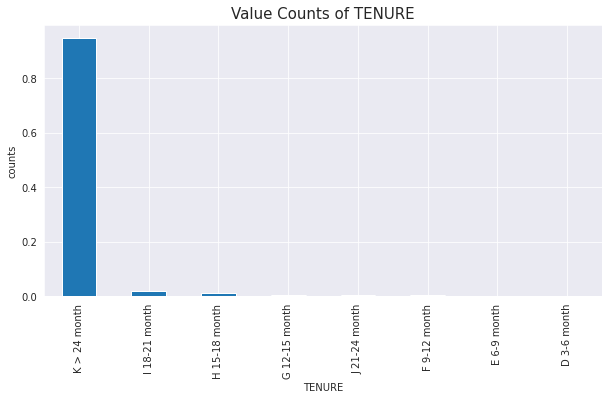

In [ ]:
check_levels(train, exclude_cols=['user_id'])

Compute statistics for numerical variables

In [ ]:
train.describe() 

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,125596.000000,125596.000000,128373.000000,128373.000000,128373.000000,9.781800e+04,122924.000000,113127.000000,77925.000000,15235.000000,12164.000000,193864.000000,112372.000000,193864.000000
mean,5549.417577,11.577136,5527.767950,1842.596769,14.013508,3.387234e+03,277.213791,95.928196,23.179865,7.688809,7.416557,27.984474,9.306633,0.188441
std,7171.390426,13.345354,7230.871687,2410.285753,14.770293,1.341194e+04,881.638677,203.990359,64.525694,34.843203,31.821617,22.276647,12.302007,0.391065
min,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000e+00,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,2.670000e+02,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7400.000000,16.000000,7402.000000,2467.000000,20.000000,2.918000e+03,157.000000,100.000000,20.000000,3.000000,5.000000,50.000000,12.000000,0.000000
max,256000.000000,115.000000,219423.000000,73141.000000,91.000000,1.238915e+06,36687.000000,6211.000000,3658.000000,1730.000000,1796.000000,62.000000,544.000000,1.000000


> Check for null values

In [ ]:
def check_null(data, plot=True):
    print(data.isnull().sum())
    if plot:
        plt.figure(figsize=(10,5))
        plt.title(f"Null Values Count", fontsize=15)
        data.isnull().sum().plot.bar()

user_id                0
TENURE                 0
MONTANT            68268
FREQUENCE_RECH     68268
REVENUE            65491
ARPU_SEGMENT       65491
FREQUENCE          65491
DATA_VOLUME        96046
ON_NET             70940
ORANGE             80737
TIGO              115939
ZONE1             178629
ZONE2             181700
REGULARITY             0
FREQ_TOP_PACK      81492
CHURN                  0
dtype: int64


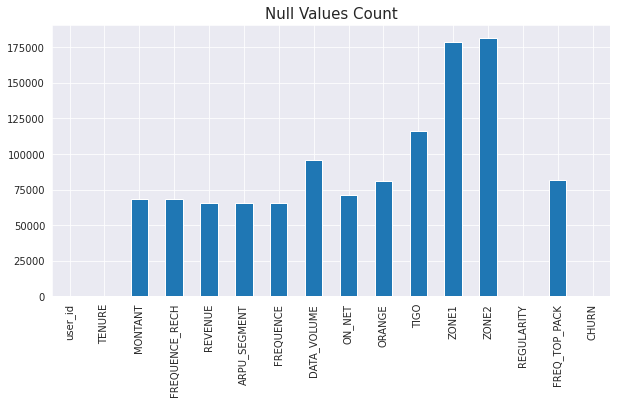

In [ ]:
check_null(train)

user_id               0
TENURE                0
MONTANT           11848
FREQUENCE_RECH    11848
REVENUE           11357
ARPU_SEGMENT      11357
FREQUENCE         11357
DATA_VOLUME       16781
ON_NET            12476
ORANGE            14045
TIGO              20346
ZONE1             31475
ZONE2             31989
REGULARITY            0
FREQ_TOP_PACK     14200
dtype: int64


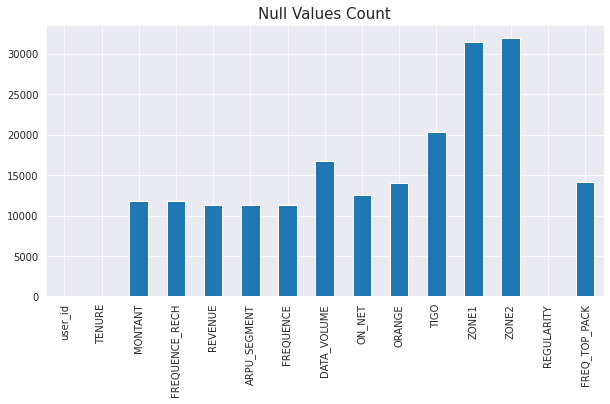

In [ ]:
check_null(test)

> There are a lot of null values in the dataset

> Check for outliers

In [ ]:
def check_outliers(data, show_plot=False, save_img=os.getcwd()+'/outliers.png'):
 
        """
        This functions checks for columns with outlers using the IQR method

        It accespts as argmuent a dataset. 
        show_plot can be set to True to output pairplots of outlier columns    
        """

        outliers = [] 
        Q1 = data.quantile(0.25)  
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        num_data = data.select_dtypes(include='number')
        result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
        #data[(data[col] >= high)|(data[col] <= low)].index
        index = data[(num_data < Q1 - 1.5 * IQR) | (num_data > Q3 + 1.5 * IQR)].index
        for k,v in result.items():
            if v == True:  
                outliers.append(k)
        if show_plot:
            outlier_pair_plot = sns.pairplot(data[outliers]);
            print(f'{result},\n\n Visualization of outlier columns')
            plt.savefig(fname=save_img, format='png')
            return  outlier_pair_plot
        else:
            return data.loc[index, outliers] 

outliers in train set

In [ ]:
train_outliers = check_outliers(train, show_plot=False)

In [ ]:
train_outliers

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,FREQ_TOP_PACK,CHURN
542316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
59878,11650.0,30.0,11682.0,3894.0,32.0,7119.0,23.0,468.0,54.0,0.0,NaN,18.0,0
10729,1000.0,2.0,1000.0,333.0,2.0,NaN,7.0,45.0,NaN,NaN,NaN,2.0,0
456437,500.0,1.0,480.0,160.0,4.0,1875.0,14.0,1.0,NaN,NaN,NaN,2.0,0
273902,11150.0,34.0,11750.0,3917.0,40.0,789.0,125.0,303.0,29.0,0.0,NaN,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392679,500.0,1.0,500.0,167.0,1.0,0.0,9.0,8.0,15.0,NaN,NaN,1.0,0
494369,1100.0,3.0,1098.0,366.0,3.0,216.0,27.0,1.0,2.0,NaN,NaN,2.0,0
59888,1000.0,2.0,1000.0,333.0,2.0,NaN,34.0,43.0,2.0,NaN,NaN,1.0,0
561559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


> most columns in the train set contain outlier values

outliers in test set

In [ ]:
test_outliers = check_outliers(test, show_plot=False) 

In [ ]:
test_outliers

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,FREQ_TOP_PACK
105281,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
22722,7900.0,16.0,7900.0,2633.0,15.0,25.0,228.0,271.0,5.0,NaN,NaN,14.0
76446,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
46673,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7008,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
71490,3800.0,5.0,3800.0,1267.0,4.0,6101.0,28.0,16.0,NaN,NaN,1.0,3.0
78321,14150.0,31.0,15548.0,5183.0,38.0,4865.0,248.0,1040.0,73.0,NaN,NaN,20.0
83665,6150.0,14.0,6151.0,2050.0,19.0,300.0,129.0,43.0,1.0,NaN,NaN,4.0


> check for duplicate values

In [ ]:
train.duplicated().any()

False

In [ ]:
test.duplicated().any()

False

> check for class imbalance

Class Imbalance

0    157332
1     36532
Name: CHURN, dtype: int64 



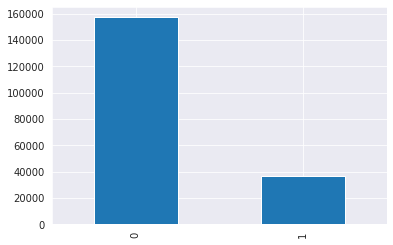

In [ ]:
print("Class Imbalance\n")
print(train.CHURN.value_counts(), "\n")
train.CHURN.value_counts().plot.bar();

> no null values 

##### Data Cleaning

- Treat outliers with Median Imputation

- Treat nul vlaues in numerical featurees with KNN, and categorical features with mode

- Use Pipeline

> Median Imputation for Outlier values

In [ ]:
def treat_numeric_outlier(data):
    for col in data.columns.tolist():
        if is_numeric_dtype(data[col]) == True: 
            median = data[col].quantile(0.50)
            q1 = data[col].quantile(0.95)
            q3 = data[col].quantile(0.05)
            iqr = q3 - q1
            high = int(q3 + 1.5 * iqr) 
            low = int(q1 - 1.5 * iqr)
            data[col] = np.where(data[col] > high, median, data[col])
            data[col] = np.where(data[col] > high, median, data[col]) 
    return data

In [ ]:
train = treat_numeric_outlier(train)

In [ ]:
check_outliers(train)

""
542316
59878
10729
456437
273902
...
392679
494369
59888
561559


no more outlier values

#### Treat NaNs in categorical and numeric variables

In [ ]:
train.select_dtypes(include='object').isna().any()

user_id    False
TENURE     False
dtype: bool

#### No nan vlaue in any categorical variable

In [ ]:
def impute_cat(X, cols=[]):
  for col in cols:
    imputer = SimpleImputer(strategy='most_frequent')
    imp.fit(pd.DataFrame(X[col])) 
    X[col] = imp.transform(pd.DataFrame(X[col]))
  return X

In [ ]:
def impute_num(X):
  num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
  print
  for col in num_cols:
    print(f'working on --> {col}')
    knn_imputer = KNNImputer()
    knn_imputer.fit(pd.DataFrame(X[col])) 
    X[col] = knn_imputer.transform(pd.DataFrame(X[col]))
  return X

In [199]:
train = impute_num(train)
train.isna().any()  

working on --> MONTANT
working on --> FREQUENCE_RECH
working on --> REVENUE
working on --> ARPU_SEGMENT
working on --> FREQUENCE
working on --> DATA_VOLUME
working on --> ON_NET
working on --> ORANGE
working on --> TIGO
working on --> ZONE1
working on --> ZONE2
working on --> REGULARITY
working on --> FREQ_TOP_PACK
working on --> CHURN


user_id           False
TENURE            False
MONTANT           False
FREQUENCE_RECH    False
REVENUE           False
ARPU_SEGMENT      False
FREQUENCE         False
DATA_VOLUME       False
ON_NET            False
ORANGE            False
TIGO              False
ZONE1             False
ZONE2             False
REGULARITY        False
FREQ_TOP_PACK     False
CHURN             False
dtype: bool

In [201]:
train = train.drop()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
542316,16a8528ec3b1201f5cb8bfc35533744b79bd44d2,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
59878,3a8b710546fb6272a56908c2fcbcef20e2caa0cf,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
10729,0f34b0bf4dac19dd901b7e03dd79cb79ed0b744a,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
456437,dc34cfe39e89bddddf7f7550431681b6fc31e72e,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
273902,3920ace4d36a498dde155bec15757407846258fc,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392679,48d344fd728daa817fdcc1d5b42c24bf9ca40227,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
494369,b8ee2c6522cb33c8a167a6978972fce2b705f8a6,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
59888,efaef8feb41c744fe8dbc5c8a05eb323ebb13a1a,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0
561559,0042094e077ec75af7ded7e3ec662c421d93d242,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,267.0,27.0,29.0,6.0,1.0,2.0,24.0,5.0,0.0


In [206]:
test = impute_num(test)
test.isna().any()  

working on --> MONTANT
working on --> FREQUENCE_RECH
working on --> REVENUE
working on --> ARPU_SEGMENT
working on --> FREQUENCE
working on --> DATA_VOLUME
working on --> ON_NET
working on --> ORANGE
working on --> TIGO
working on --> ZONE1
working on --> ZONE2
working on --> REGULARITY
working on --> FREQ_TOP_PACK


user_id           False
TENURE            False
MONTANT           False
FREQUENCE_RECH    False
REVENUE           False
ARPU_SEGMENT      False
FREQUENCE         False
DATA_VOLUME       False
ON_NET            False
ORANGE            False
TIGO              False
ZONE1             False
ZONE2             False
REGULARITY        False
FREQ_TOP_PACK     False
dtype: bool

In [207]:
test

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
105281,e66972d08a6e90ca121fc74275e1e4adc7770fc3,K > 24 month,5523.347628,11.465322,5512.03763,1837.350179,13.952525,0.000000,281.347412,93.791481,22.599351,9.884868,8.09586,3.0,9.296087
22722,bf9be697fbd32dc7b8ab3073ee4d3bbbcad6dfe9,K > 24 month,7900.000000,16.000000,7900.00000,2633.000000,15.000000,25.000000,228.000000,271.000000,5.000000,9.884868,8.09586,62.0,14.000000
76446,1e7202861abcaf7e0eea63032254eacf26bb098d,K > 24 month,5523.347628,11.465322,5512.03763,1837.350179,13.952525,0.000000,281.347412,93.791481,22.599351,9.884868,8.09586,23.0,9.296087
46673,f4eed3780dbca03e08c43adfcf0a9463368358d9,H 15-18 month,5523.347628,11.465322,5512.03763,1837.350179,13.952525,0.000000,281.347412,93.791481,22.599351,9.884868,8.09586,62.0,9.296087
7006,e71d6090175d55f4b7f3abc99e5f1823616960f0,K > 24 month,5523.347628,11.465322,5512.03763,1837.350179,13.952525,3358.770281,281.347412,93.791481,22.599351,9.884868,8.09586,5.0,9.296087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,5ecbf66d9bb8b8642ef1e5fc8c9d844989376589,K > 24 month,5523.347628,11.465322,5512.03763,1837.350179,13.952525,0.000000,281.347412,93.791481,22.599351,0.000000,8.09586,8.0,9.296087
71490,c3a0be58c8dee43c1c5df623c289d166a7014a10,K > 24 month,3800.000000,5.000000,3800.00000,1267.000000,4.000000,6101.000000,28.000000,16.000000,22.599351,9.884868,1.00000,33.0,3.000000
78321,d36271d90f822c1da3e3d531136bb9a19d577be3,K > 24 month,14150.000000,31.000000,15548.00000,5183.000000,38.000000,4865.000000,248.000000,1040.000000,73.000000,9.884868,8.09586,60.0,20.000000
83665,5a3e2643344a107f4050fce01d92152c12581c1f,K > 24 month,6150.000000,14.000000,6151.00000,2050.000000,19.000000,300.000000,129.000000,43.000000,1.000000,9.884868,8.09586,62.0,4.000000


#### save cleaned data

In [208]:
train.to_csv('/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/clean_train.csv') 
test.to_csv('/content/drive/My Drive/Zindi-Competionts/customer-churn-prediction/datasets/clean_test.csv') 

> Create piepleinf to clean preprocess numeric and catgegorical vlaues

In [ ]:
# cat_features = train.select_dtypes(include='object').drop('user_id', axis=1).columns.tolist()
# cat_features

In [ ]:
# num_features = train.select_dtypes(include=['int64', 'float64']).drop('CHURN', axis=1).columns.tolist()
# num_features

In [ ]:
# ?LabelEncoder

In [ ]:
# # cat_transform = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
# #                               ('encode', OneHotEncoder())])

# num_transform= Pipeline(steps=[('scaler',RobustScaler()),
#                                ('imputer', KNNImputer(copy=False))])


# data_transform = ColumnTransformer(transformers=[#('cat_transform', cat_transform,cat_features),
#                                                 ('num_transform', num_transform, num_features)]
#                                   , remainder='passthrough', verbose=True)

# preprocess = Pipeline(steps=[('transform', data_transform)], verbose=True)

## Modelling

Algorithms:

- logisticRegression - Basemodel

- Catboost

- XGboost

- LGBM

Techniques

- cross validation

- hp-tuning

- over-sampling imbalance

>> Import needed libraries

In [209]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import  Pipeline as imbPipe
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, plot_roc_curve, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

##### Define functions to save satisifed predictions

In [210]:
def save_pred(y_hat, test_set, file_name ="new_submission"):
  prediction_path = '/content/drive/My Drive/Zindi-Competionts/zimnat_Challenge_predicting_insurance_purchase/submissions/'
  from datetime import datetime
  file_name=file_name+datetime.now().strftime('%Y-%m-%d')
  submissions = pd.DataFrame({'ID X PCODE':test_set['ID X PCODE'],'Label':y_hat})
  submissions.to_csv(prediction_path+file_name, index=False)
  return submissons

#### Define functions to mesaure predictions performance

In [211]:
class PredMetrics():

  def __init__( X, y, y_pred, y_true, model, scorer:make_scorer,
                 verbose=False, cv=StratifiedKFold(random_state=123)):
    
    self.X = X
    self.y = y
    self.y_pred = y_pred
    self.y_true = y_true
    self.model = model
    self.scorer = scorer
    self.cv = cv

  def __repl__():
    return "Prediction Metrics"

  
  def cv_score(self):

     self.cv_score_metric = cross_val_score(model = self.model, X=self.X, y=self.y, scoring = self.scorer, verbose=verbose, cv=self.cv)

     return self.cv_score_metric

  def conf_matrix(self):

    self.conf_matrix_metric = confusion_matrix(y_true=self.y_true, y_pred=self.y_pred)

    return self.conf_matrix_metric

  def log_loss_score(self):

    self.log_loss_metric = log_loss(y_true = self.y_true, y_pred = self.y_pred)

    return self.log_loss_metric

  def roc_curve(self):

    self.plot_roc_metric = plot_roc_curve(self.model, X=self.X, y = self.y)
      
    return self.plot_roc_metric
  
  def class_report(self):

    self.class_report_metric = classification_report(y_true = self.y_true, y_pred = self.y_pred)

    return self.class_report_metric

### Splitting Data



split to X & Y

In [218]:
hold_out = test.copy()
print(hold_out.shape)

(34211, 15)


In [214]:
X, y = train.drop('CHURN', axis=1), train.CHURN
print(X.shape)
print(y.shape)

(193864, 15)
(193864,)


split to train and test set

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9) 
print(X_train.shape)
print(y_train.shape)

(174477, 15)
(174477,)


split to train and val set

In [217]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, train_size=0.8)
print(X_train2.shape)
print(y_train2.shape)

(139581, 15)
(139581,)


### Build Basemodel with LogisticRegression


#### Measure Logistic model

In [ ]:
log_metric = PredMetrics(X_train, y_train, )